## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


IDEAS

 - box office profit compared to:
   - runtime
   - production budget
   - genre (per month/sesason?)
   - by rating (r, pg, ...)
   - male vs female lead role
   - movies released per region (looking at movie aka regions)
   - prominent role categories present (sound design, video etc.)
   - best directors and writers
   
 - rating compared to
   - box office

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import calendar
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Importing all the Data

## imdb

In [4]:
%%bash 
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [6]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [7]:
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
directors_df = pd.read_sql("""SELECT * FROM directors """, conn)          # 291174  movie_id  (140417 unique)
known_for_df = pd.read_sql("""SELECT * FROM known_for """, conn)          # 1638260 person_id 
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas """, conn)        # 331703  movie_id
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings """, conn)  # 73856   movie_id
persons_df = pd.read_sql("""SELECT * FROM persons """, conn)              # 606648  person_id
principals_df = pd.read_sql("""SELECT * FROM principals """, conn)        # 1028186 principals
writers_df = pd.read_sql("""SELECT * FROM writers """, conn)              # 255873  movie_id

In [10]:
# df_with_directors -> movie basics + directors (contains duplicates when a movie has multiple directors)
directors_df = directors_df.drop_duplicates()
df_with_directors = movie_basics_df.merge(directors_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_directors = df_with_directors.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_directors.rename(columns={'primary_name':'director_name','person_id':'director_id'}, inplace=True)
df_with_directors.drop(columns=['director_id'], inplace=True)
df_with_directors.drop_duplicates(inplace=True)
df_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Valeria Sarmiento
...,...,...,...,...,...,...,...
169257,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
169258,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
169259,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
169260,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [11]:
# df_with_writers -> movie basics + writers (contains duplicates when a movie has multiple writers)
writers_df = writers_df.drop_duplicates()
df_with_writers = movie_basics_df.merge(writers_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_writers = df_with_writers.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_writers.rename(columns={'primary_name':'writer_name','person_id':'writer_id'}, inplace=True)
df_with_writers.drop(columns=['writer_id'], inplace=True)
df_with_writers.drop_duplicates(inplace=True)
df_with_writers

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
...,...,...,...,...,...,...,...
214230,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
214231,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dr. Sudhir Nikam
214232,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
214233,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


## bom movie gross

In [161]:
# df_with_gross matches gross for all movies with the same name
gross_df = pd.read_csv('data/bom.movie_gross.csv')
gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
gross_df['foreign_gross'] = gross_df['foreign_gross'].map(lambda x: float(x.replace(',',"")))
gross_df['total_gross'] = gross_df['foreign_gross'] + gross_df['domestic_gross']
# df_with_gross = movie_basics_df.merge(gross_df,
#                                       how='inner',
#                                       left_on='primary_title',
#                                       right_on='title')

## TN movie budgets

In [162]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

budgets_df.drop(columns=['id'], inplace=True)
# convert dates and prices from strings to numbers
budgets_df['release_year'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]

# merge with imdb
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on=['primary_title','start_year'],
                                     suffixes=['_imdb','_budgets'],
                                     right_on=['movie','release_year'])

# modern_budgets_df since 2013
modern_budgets_df = budgets_df.loc[budgets_df['release_year'] >= 2013]

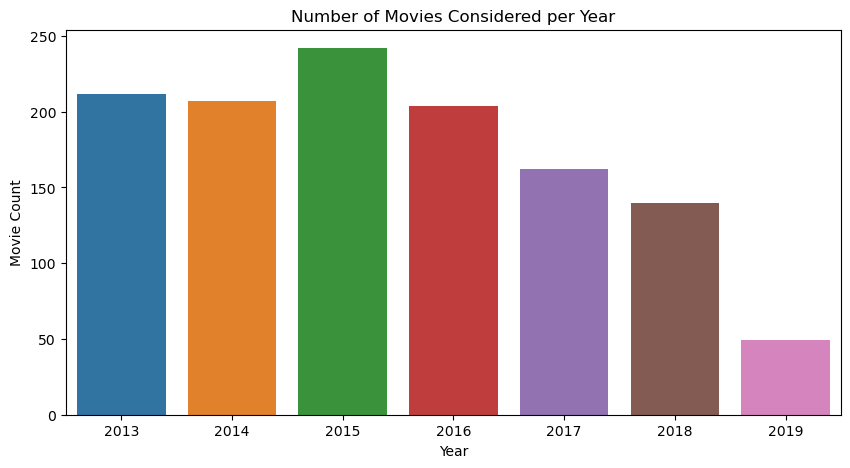

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
plt.show()

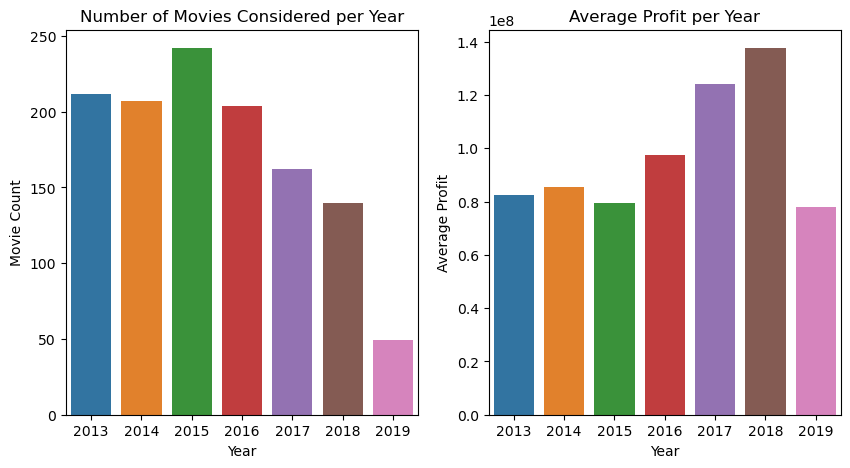

In [165]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = modern_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
plt.show()

## rt movie info

In [146]:
rt_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

def to_week_day(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month_id = list(calendar.month_abbr).index(date[0])
    return calendar.weekday(int(date[2]),month_id,int(date[1]))

def to_season(date):
    date = date.split()
    date[1] = date[1].replace(',','')
    month = date[0]
    day = int(date[1])
    if month in ('Jan', 'Feb', 'Mar'):
        season = 'winter'
    elif month in ('Apr', 'May', 'Jun'):
        season = 'spring'
    elif month in ('Jul', 'Aug', 'Sep'):
        season = 'summer'
    else:
        season = 'autumn'

    if (month == 'Mar') and (day > 19):
        season = 'spring'
    elif (month == 'Jun') and (day > 20):
        season = 'summer'
    elif (month == 'Sep') and (day > 21):
        season = 'autumn'
    elif (month == 'Dec') and (day > 20):
        season = 'winter'
    return season

# rt_cleaned_df disconsiders nan values, rt_cleaned_df_10 is only the 2010
rt_cleaned_df = rt_info_df.dropna()
rt_cleaned_df['box_office'] = rt_cleaned_df.box_office.map(lambda x : int(x.replace(',','')))
rt_cleaned_df['runtime'] = rt_cleaned_df.runtime.map(lambda x: int(x[:-8]))
rt_cleaned_df['theater_year'] = rt_cleaned_df.theater_date.map(lambda x : int(x[-4:]))
rt_cleaned_df['theater_weekday_id'] = \
    rt_cleaned_df.theater_date.map(to_week_day)
rt_cleaned_df['theater_weekday'] = rt_cleaned_df.theater_weekday_id.map({1:'tues',2:'wed',3:'thurs',4:'fri'})
rt_cleaned_df['theater_season'] = rt_cleaned_df.theater_date.map(to_season)
rt_cleaned_df_10 = rt_cleaned_df.loc[rt_cleaned_df['theater_year'] >= 2000]

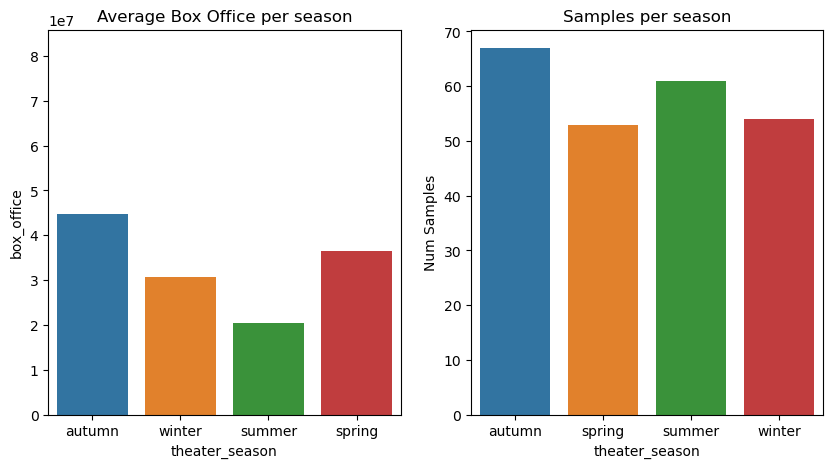

In [183]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_season', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per season')
data = rt_cleaned_df.groupby('theater_season').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per season', ylabel='Num Samples')
plt.show()

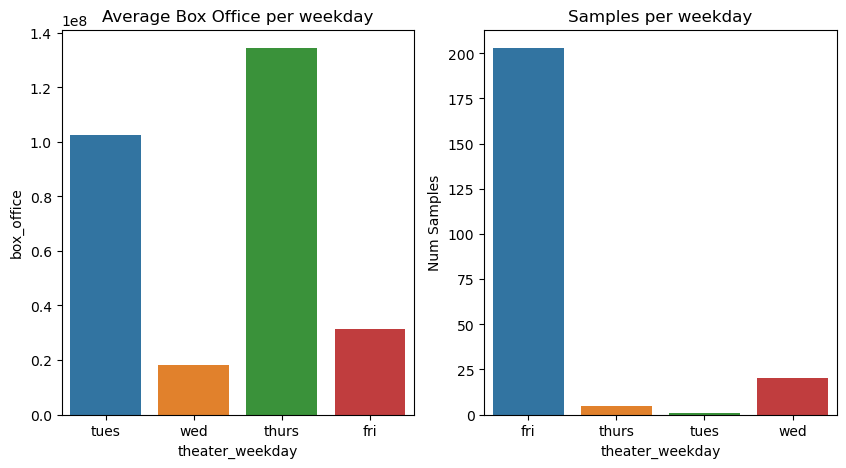

In [177]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.barplot(x = 'theater_weekday', 
            y='box_office', 
            data = rt_cleaned_df_10.sort_values(by='theater_weekday_id'), 
            ax=ax1, 
            errwidth=0).set(title='Average Box Office per weekday')
data = rt_cleaned_df.groupby('theater_weekday').count()
sns.barplot(x = data.index, 
            y = 'id',
            data = data,
            ax=ax2, 
            errwidth=0).set(title='Samples per weekday', ylabel='Num Samples')
plt.show()

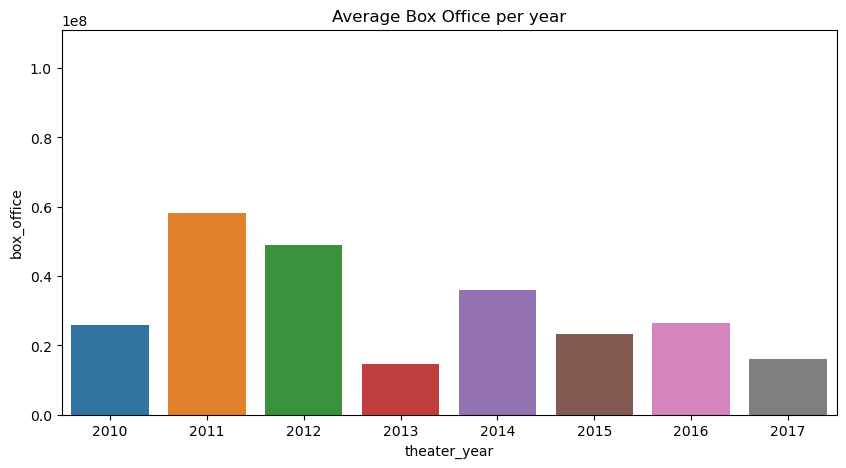

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = 'theater_year', 
            y = 'box_office',
            data = rt_cleaned_df_10, 
            errwidth=0,
            ax=ax).set(title='Average Box Office per year')
plt.show()

## rt reviews

In [30]:
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


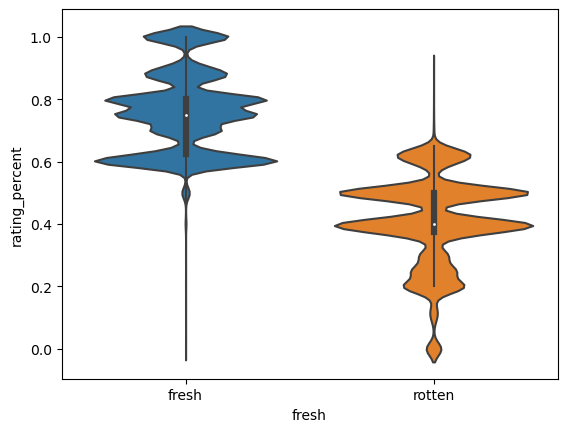

In [369]:
# ratings vs freshness
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df.dropna(subset=['rating'], inplace=True)

def rating_map(x):
    if x[0].isnumeric() and len(x.split()) == 1:
        if '/' in x: return eval(x)
    return np.nan

rt_reviews_df['rating_percent'] = rt_reviews_df.rating.map(rating_map)
rt_reviews_df.dropna(subset=['rating_percent'],inplace=True)
rt_reviews_df.drop(index = rt_reviews_df.loc[rt_reviews_df['rating_percent'] > 1].index, inplace=True)
ax = sns.violinplot(x='fresh',y='rating_percent', data=rt_reviews_df)

# Cost vs Revenue

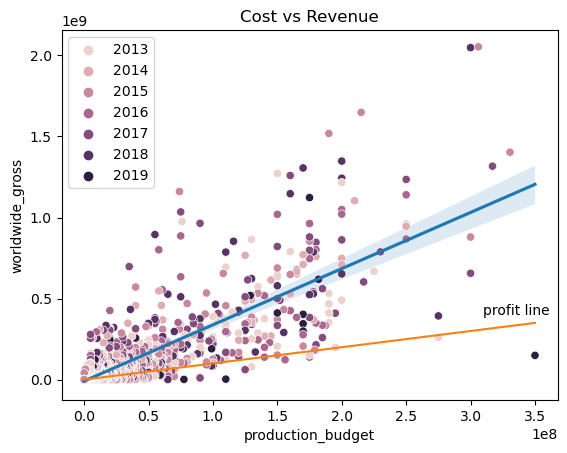

0.7924385564080456

In [389]:
fig, ax = plt.subplots()
sns.regplot(x='production_budget',
            y='worldwide_gross',
            scatter=False,
            data=modern_budgets_df,
            ax=ax)
sns.scatterplot(x='production_budget',
                y='worldwide_gross',
                hue='release_year',
                data=modern_budgets_df,
                ax=ax)
sns.lineplot(x=range(0,350000000, 10000),
             y=range(0, 350000000, 10000),
             ax=ax)
ax.set(title='Cost vs Revenue')
ax.text(310000000,400000000,'profit line')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

# Profit vs runtime

In [5]:
# CONSIDER IMPUTING MEAN/MEDIAN for 31k out of 146k 
runtime_df = movie_basics_df.dropna(subset=['runtime_minutes'])
runtime_df = runtime_df.loc[runtime_df['runtime_minutes'] < 200]
profit_runtime_df = modern_budgets_df.merge(runtime_df[['primary_title','start_year','runtime_minutes']],
                                            how='inner',
                                            left_on=['movie','release_year'],
                                            right_on=['primary_title','start_year'])
profit_runtime_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,primary_title,start_year,runtime_minutes
0,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Dark Phoenix,2019,113.0
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron,2015,141.0
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200,Avengers: Infinity War,2018,149.0
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,355945209,Justice League,2017,120.0
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,579620923,Spectre,2015,148.0
...,...,...,...,...,...,...,...,...,...,...
914,"Jul 25, 2014",Happy Christmas,70000,30312,30312,2014,-39688,Happy Christmas,2014,82.0
915,"Jul 31, 2015",Counting,50000,8374,8374,2015,-41626,Counting,2015,111.0
916,"Jan 27, 2017",Emily,27000,3547,3547,2017,-23453,Emily,2017,83.0
917,"Sep 1, 2015",Exeter,25000,0,489792,2015,464792,Exeter,2015,91.0


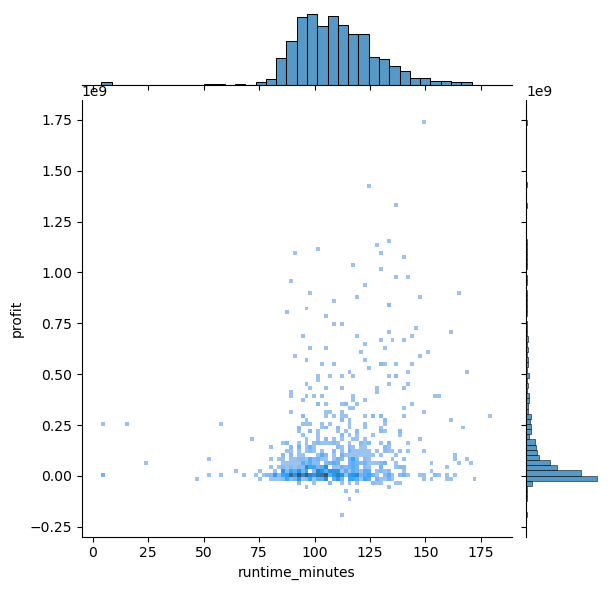

In [26]:
sns.jointplot(x='runtime_minutes',
              y='profit',
              data=profit_runtime_df,
              kind='hist',
              bins=100)
# sns.lineplot(x=range(0,200, 10),
#              y=[0] * 20,
             
#              ax=ax)
plt.show()

# Genre vs profit

In [ ]:
# SET MODERN BUDGETS TO EXCLUDE 150/1200 PROFIT OUTLIERS
iqr = modern_budgets_df['profit'].quantile(.75) - modern_budgets_df['profit'].quantile(.25)
upper_bound = modern_budgets_df.profit.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.profit.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.profit < upper_bound) & (modern_budgets_df.profit > lower_bound)]

In [213]:
# profit_genre_df has genres for each film split (exploded) into multiple rows
genre_df = movie_basics_df.dropna(subset=['genres'])
genre_df['genres'] = genre_df['genres'].map(lambda x: x.split(','))
genre_df = genre_df.explode('genres')
profit_genre_df = modern_budgets_df.merge(genre_df,
                                          how='inner',
                                          left_on=['movie','release_year'],
                                          right_on=['primary_title', 'start_year'],
                                          suffixes=['_budgets','_genres'])

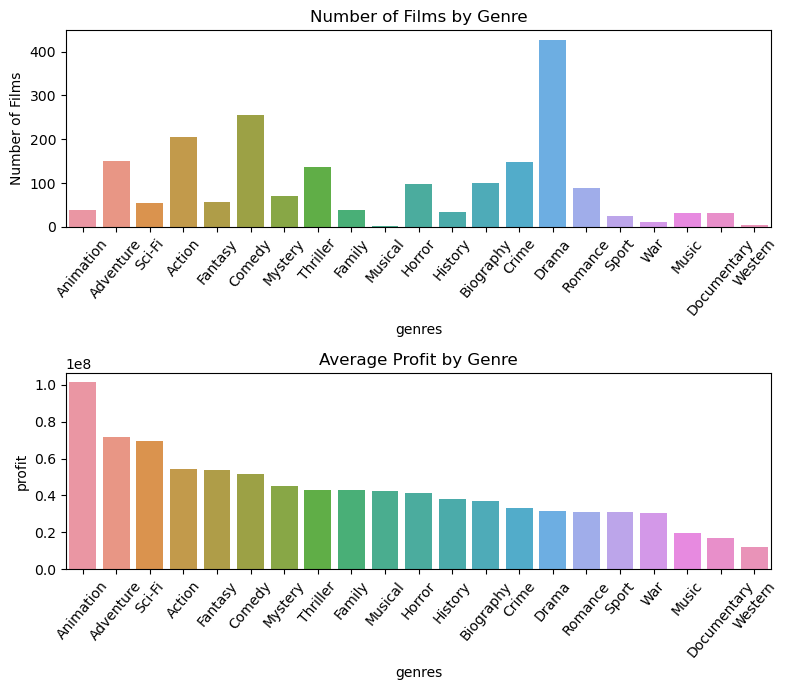

In [214]:
#data for profit per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# data for counts per genre
grouped_count_profit_genre_df = profit_genre_df.groupby('genres').count()
genre_order_mapping = {k:v for k,v in zip(grouped_profit_genre_df.index,range(len(grouped_profit_genre_df)))}
grouped_count_profit_genre_df['genre_order'] = pd.Series(grouped_count_profit_genre_df.index).map(genre_order_mapping).to_list()
grouped_count_profit_genre_df = grouped_count_profit_genre_df.sort_values(by='genre_order')

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,7))
sns.barplot(x=grouped_count_profit_genre_df.index,
            y='profit',
            data=grouped_count_profit_genre_df,
            errwidth=0,
            ax=ax1).set(title='Number of Films by Genre', ylabel='Number of Films')
ax1.set_xticklabels(grouped_count_profit_genre_df.index, rotation=50)

sns.barplot(x=grouped_profit_genre_df.index,
            y='profit',
            data=grouped_profit_genre_df,
            errwidth=0,
            ax=ax2).set(title='Average Profit by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

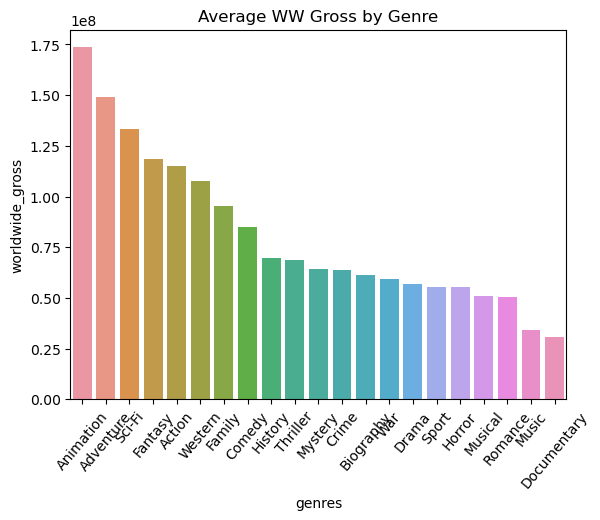

In [215]:
#data for ww gross per genre
grouped_profit_genre_df = profit_genre_df.groupby('genres').mean().sort_values(by='worldwide_gross', ascending=False)

sns.barplot(x=grouped_profit_genre_df.index,
            y='worldwide_gross',
            data=grouped_profit_genre_df,
            errwidth=0).set(title='Average WW Gross by Genre')

plt.xticks(rotation=50)
fig.tight_layout()
plt.show()

In [216]:
# profit_genreTuples_df has genres tuples for each film split (exploded) into multiple rows
# (max of 2 genre's per row)
genreTuples_df = movie_basics_df.dropna(subset=['genres'])[['movie_id','primary_title','start_year','genres']]
genreTuples_df['genres'] = genreTuples_df['genres'].map(lambda x: tuple(x.split(',')))
profit_genreTuples_df = modern_budgets_df.merge(genreTuples_df,
                                                how='inner',
                                                left_on=['movie','release_year'],
                                                right_on=['primary_title', 'start_year'])[['profit','genres']]

for i in profit_genreTuples_df.index:
    row = profit_genreTuples_df.iloc[i]
        
    genres = row['genres']
    if len(genres) == 3:
        new_row = {'profit':row['profit']}

        # genres[0,1]
        new_row['genres'] = (genres[0],genres[1])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[0,2]
        new_row['genres'] = (genres[0],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        # genres[1,2]
        new_row['genres'] = (genres[1],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        
profit_genreTuples_df = profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: True if len(x) < 3 else False)]
profit_genreTuples_df


,profit,genres
3,2687603,"(Adventure, Fantasy)"
4,161040419,"(Drama, Romance)"
12,192541256,"(Action, Sci-Fi)"
26,184486852,"(Documentary,)"
60,143388614,"(Comedy,)"
...,...,...
2341,-79944,"(Biography, Music)"
2342,-79944,"(Documentary, Music)"
2343,464792,"(Horror, Mystery)"
2344,464792,"(Horror, Thriller)"


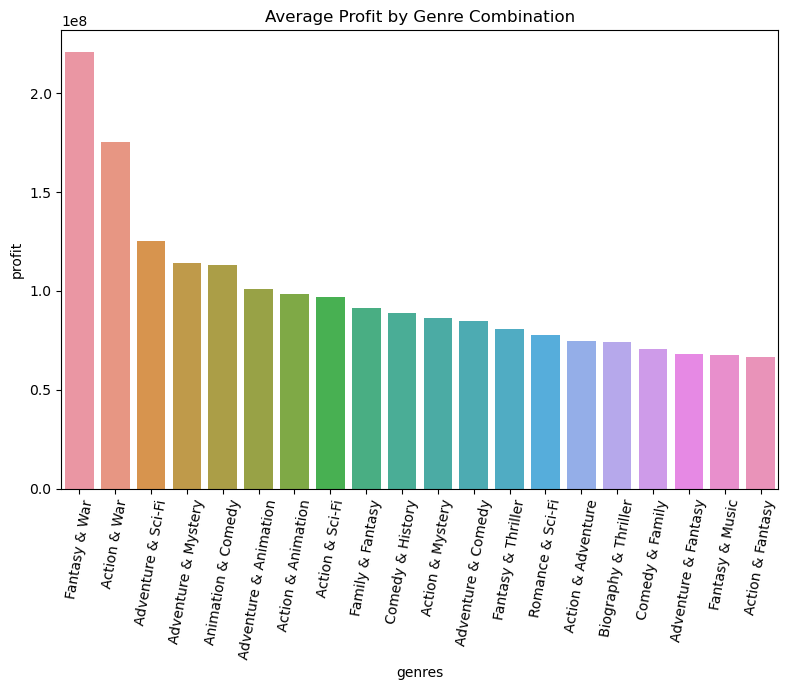

In [217]:
# data for profit per genreTuples (top 20 highest profitting genreTuples)
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,7))

xlabels = []
for g in grouped_tuples_df.index:
    if len(g) == 2:
        xlabels.append('{} & {}'.format(g[0],g[1]))
    else:
        xlabels.append(g[0])

sns.barplot(x=grouped_tuples_df.index,
            y='profit',
            data=grouped_tuples_df,
            errwidth=0,
            ax=ax).set(title='Average Profit by Genre Combination', xticklabels=xlabels)
plt.xticks(rotation=80)
fig.tight_layout()
plt.show()

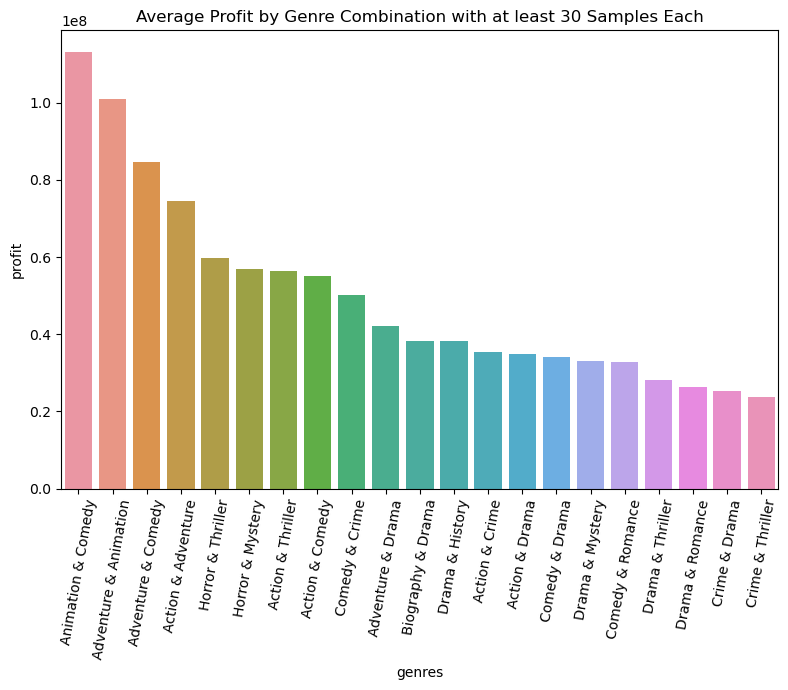

In [218]:
# DATA FOR PROFIT PER GENRETUPLES WITH AT LEAST 30 SAMPLES EACH

# reset grouped_tuples so its not just the top 20
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# grouped_tuple_count_df has 129 unique genre-combo movies and single-genre movies (29 with over 30 samples)
grouped_tuple_count_df = profit_genreTuples_df.groupby('genres').count()
grouped_tuple_count_df = grouped_tuple_count_df.loc[grouped_tuple_count_df['profit'] > 30]
tuple_profit_30samples_df = grouped_tuples_df.join(grouped_tuple_count_df, how='inner', rsuffix='_count').sort_values(by='profit', ascending=False)

fig, ax = plt.subplots(figsize=(8,7))

xlabels = []
for g in tuple_profit_30samples_df.index:
    if len(g) == 2:
        xlabels.append('{} & {}'.format(g[0],g[1]))
    else:
        xlabels.append(g[0])

sns.barplot(x=tuple_profit_30samples_df.index,
            y='profit',
            data=tuple_profit_30samples_df,
            errwidth=0,
            ax=ax).set(title='Average Profit by Genre Combination with at least 30 Samples Each', xticklabels=xlabels)
plt.xticks(rotation=80)
fig.tight_layout()
plt.show()

# TESTS

In [207]:
iqr = modern_budgets_df['profit'].quantile(.75) - modern_budgets_df['profit'].quantile(.25)
upper_bound = modern_budgets_df.profit.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.profit.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.profit < upper_bound) & (modern_budgets_df.profit > lower_bound)]

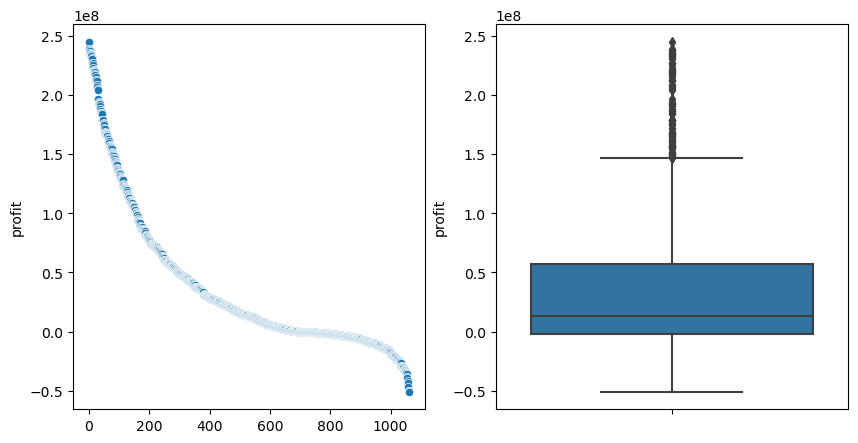

In [208]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=range(len(modern_budgets_df)),y=modern_budgets_df['profit'].sort_values(ascending=False), ax=ax1)
sns.boxplot(y=modern_budgets_df['profit'].sort_values(ascending=False), ax=ax2)
plt.show()